## Credit card status payment

During this paper, we will analyze the information provided on credit card usage of a set of customers in a bank in Taiwan. With this information we will build a model to predict payments.

### Variables

* CREDIT ID: Identifier of each client. LIMIT BAL: Credit Line Amount 
* SEX: Gender (1=male, 2=female) 
* EDUCATION: (1=high school, 2=college, 3= Middle School, 4=other, 5=unknown, 6=unknown) 
* MARRIAGE: Marital status (1=married, 2=single, 3=other) 
* AGE: Age in years 
* PAY 2: Payment status in August, 2005 (-1=payment correct, 1=payment delayed by one month, 2=payment delayed by two months , ... 8=payment delayed for eight months, 9=payment delayed for nine or more months)
* PAY 3: Payment status in July, 2005 (The scale is the same as in PAY 2) 
* PAY 4: Payment status as of June, 2005 (Scale is the same as PAY 2) 
* PAY 5: Payment status in May, 2005 (Scale is the same as PAY 2) 
* PAY 6: Payment status in April, 2005 (Scale is the same as in PAY 2) 
* BILL AMT3: Amount to be paid in July, 2005 
* BILL AMT4: Amount payable in June, 2005 
* BILL AMT5: Amount due in May, 2005 
* BILL AMT6: Amount payable in April, 2005 
* PAY AMT2: Amount paid in August, 2005 PAY AMT2: Amount paid in August, 2005 
* BILL AMT3: Amount paid in July, 2005 
* PAY AMT4: Amount paid in June, 2005 
* PAY AMT5: Amount paid in May, 2005 
* PAY AMT6: Amount Paid in April, 2005 

### Libraries 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import matplotlib.gridspec as gridspec
from warnings import filterwarnings
from scipy.stats import zscore
from scipy import stats

In [13]:
filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

### Importing Data 

In [14]:
data_train = pd.read_excel("Train.xlsx")
data_val = pd.read_excel('Val.xlsx')

In [15]:
data_train.head()

,Unnamed: 0,ID_CREDIT,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,241,250000,2,1,1,40,-1,-1,0,-1,3989,11577,11377,500,3989,11577,0,500,25841
1,1,19513,50000,1,2,2,24,0,0,0,0,36086,32945,29348,23570,3011,1019,1019,2015,17
2,2,8147,150000,2,1,2,36,2,0,0,0,24335,24908,15339,0,0,1200,507,0,0
3,3,1760,80000,2,2,1,35,2,2,2,3,69602,70752,74183,72727,4688,2900,5200,0,3000
4,4,7653,180000,2,1,2,30,0,0,0,-1,107685,106060,2958,1079,6000,3000,100,1100,800


In [16]:
data_val.head()

,Unnamed: 0,ID_CREDIT,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,16185,100000,2,2,1,39,0,0,0,0,0,57529,58070,58615,58760,1696,1889,1764,1714
1,1,23605,120000,1,3,1,38,0,0,0,0,0,58882,59862,51172,52533,1857,1723,2075,1500
2,2,5346,50000,2,2,1,23,0,0,0,0,0,38726,28598,29277,27310,1000,1100,1000,999
3,3,24410,100000,2,1,2,42,0,0,0,0,0,94925,96837,98894,100500,2718,2854,2500,0
4,4,5654,20000,1,3,2,24,1,-2,-2,-2,-2,-1400,-1000,-1000,0,1000,0,1000,0


### Feature Engineering 

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  21000 non-null  int64
 1   ID_CREDIT   21000 non-null  int64
 2   LIMIT_BAL   21000 non-null  int64
 3   SEX         21000 non-null  int64
 4   EDUCATION   21000 non-null  int64
 5   MARRIAGE    21000 non-null  int64
 6   AGE         21000 non-null  int64
 7   PAY_3       21000 non-null  int64
 8   PAY_4       21000 non-null  int64
 9   PAY_5       21000 non-null  int64
 10  PAY_6       21000 non-null  int64
 11  BILL_AMT3   21000 non-null  int64
 12  BILL_AMT4   21000 non-null  int64
 13  BILL_AMT5   21000 non-null  int64
 14  BILL_AMT6   21000 non-null  int64
 15  PAY_AMT2    21000 non-null  int64
 16  PAY_AMT3    21000 non-null  int64
 17  PAY_AMT4    21000 non-null  int64
 18  PAY_AMT5    21000 non-null  int64
 19  PAY_AMT6    21000 non-null  int64
dtypes: int64(20)
memory usage: 3

In [18]:
data_train.describe()

,Unnamed: 0,ID_CREDIT,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,10499.500000,15075.297667,167255.523810,1.601810,1.851000,1.55300,35.436762,-0.167000,-0.219381,-0.262810,-0.290095,4.711136e+04,43457.286381,40407.225333,39059.894667,5.949706e+03,5420.154000,4815.076143,4937.011619,5233.530048
std,6062.322162,8641.622755,129658.774198,0.489537,0.788954,0.52196,9.204483,1.195921,1.170911,1.135191,1.151108,7.007852e+04,64898.977875,61020.822951,59981.601033,2.510940e+04,19388.482005,15586.591343,16458.909415,18132.182159
min,0.000000,1.000000,10000.000000,1.000000,0.000000,0.00000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5249.750000,7640.750000,50000.000000,1.000000,1.000000,1.00000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.690250e+03,2342.000000,1780.000000,1220.000000,8.277500e+02,390.000000,291.000000,200.750000,100.000000
50%,10499.500000,15122.500000,140000.000000,2.000000,2.000000,2.00000,34.000000,0.000000,0.000000,0.000000,0.000000,2.010550e+04,19102.500000,18134.000000,17170.000000,2.006500e+03,1809.500000,1500.000000,1500.000000,1500.000000
75%,15749.250000,22546.750000,240000.000000,2.000000,2.000000,2.00000,41.000000,0.000000,0.000000,0.000000,0.000000,5.987350e+04,54617.750000,50279.250000,49469.250000,5.000000e+03,4557.250000,4003.000000,4009.000000,4000.000000
max,20999.000000,30000.000000,1000000.000000,2.000000,6.000000,3.00000,79.000000,8.000000,8.000000,8.000000,8.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [19]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  9000 non-null   int64
 1   ID_CREDIT   9000 non-null   int64
 2   LIMIT_BAL   9000 non-null   int64
 3   SEX         9000 non-null   int64
 4   EDUCATION   9000 non-null   int64
 5   MARRIAGE    9000 non-null   int64
 6   AGE         9000 non-null   int64
 7   PAY_0       9000 non-null   int64
 8   PAY_3       9000 non-null   int64
 9   PAY_4       9000 non-null   int64
 10  PAY_5       9000 non-null   int64
 11  PAY_6       9000 non-null   int64
 12  BILL_AMT3   9000 non-null   int64
 13  BILL_AMT4   9000 non-null   int64
 14  BILL_AMT5   9000 non-null   int64
 15  BILL_AMT6   9000 non-null   int64
 16  PAY_AMT3    9000 non-null   int64
 17  PAY_AMT4    9000 non-null   int64
 18  PAY_AMT5    9000 non-null   int64
 19  PAY_AMT6    9000 non-null   int64
dtypes: int64(20)
memory usage: 1.4

In [20]:
#Show Nan values
multis = data_train.ID_CREDIT.value_counts() 
multis = multis[multis.values>1] 
multis

Series([], Name: ID_CREDIT, dtype: int64)

In [21]:
#Show Nan values 
multis1 = data_val.ID_CREDIT.value_counts() 
multis1 = multis[multis.values>1] 
multis1

Series([], Name: ID_CREDIT, dtype: int64)

In [22]:
#Duplicate Values 
duplicates_index1 = data_train[data_train.duplicated(keep="first")].index
duplicates_index1

Int64Index([], dtype='int64')

In [23]:
#Duplicate Values 
duplicates_index = data_val[data_val.duplicated(keep="first")].index
duplicates_index

Int64Index([], dtype='int64')

In [24]:
#Show categories 
data_train['EDUCATION'].unique()

array([1, 2, 3, 6, 5, 4, 0])

In [25]:
#The categories 4:others, 5:unknown, and 6:unknown can be grouped into a single class '4'.
data_train['EDUCATION']=np.where(data_train['EDUCATION'] == 5, 4, data_train['EDUCATION'])
data_train['EDUCATION']=np.where(data_train['EDUCATION'] == 6, 4, data_train['EDUCATION'])
data_train['EDUCATION']=np.where(data_train['EDUCATION'] == 0, 4, data_train['EDUCATION'])
data_train['EDUCATION'].unique()

array([1, 2, 3, 4])

In [26]:
data_val['EDUCATION'].unique()

array([2, 3, 1, 4, 5, 0, 6])

In [27]:
#The categories 4:others, 5:unknown, and 6:unknown can be grouped into a single class '4'.
data_val['EDUCATION']=np.where(data_val['EDUCATION'] == 5, 4, data_val['EDUCATION'])
data_val['EDUCATION']=np.where(data_val['EDUCATION'] == 6, 4, data_val['EDUCATION'])
data_val['EDUCATION']=np.where(data_val['EDUCATION'] == 0, 4, data_val['EDUCATION'])
data_val['EDUCATION'].unique()

array([2, 3, 1, 4])

In [28]:
data_train = data_train.drop(data_train.columns[0], axis = 1)
data_train.head()

,ID_CREDIT,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,241,250000,2,1,1,40,-1,-1,0,-1,3989,11577,11377,500,3989,11577,0,500,25841
1,19513,50000,1,2,2,24,0,0,0,0,36086,32945,29348,23570,3011,1019,1019,2015,17
2,8147,150000,2,1,2,36,2,0,0,0,24335,24908,15339,0,0,1200,507,0,0
3,1760,80000,2,2,1,35,2,2,2,3,69602,70752,74183,72727,4688,2900,5200,0,3000
4,7653,180000,2,1,2,30,0,0,0,-1,107685,106060,2958,1079,6000,3000,100,1100,800


In [29]:
data_train.columns

Index(['ID_CREDIT', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
       'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [30]:
data_val = data_val.drop(data_val.columns[0], axis = 1)
data_val.head()

,ID_CREDIT,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,16185,100000,2,2,1,39,0,0,0,0,0,57529,58070,58615,58760,1696,1889,1764,1714
1,23605,120000,1,3,1,38,0,0,0,0,0,58882,59862,51172,52533,1857,1723,2075,1500
2,5346,50000,2,2,1,23,0,0,0,0,0,38726,28598,29277,27310,1000,1100,1000,999
3,24410,100000,2,1,2,42,0,0,0,0,0,94925,96837,98894,100500,2718,2854,2500,0
4,5654,20000,1,3,2,24,1,-2,-2,-2,-2,-1400,-1000,-1000,0,1000,0,1000,0


In [ ]:
data_val.columns()

In [31]:
z_scores = stats.zscore(data_train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_train = data_train[filtered_entries]
data_train.count()

ID_CREDIT    19061
LIMIT_BAL    19061
SEX          19061
EDUCATION    19061
MARRIAGE     19061
AGE          19061
PAY_3        19061
PAY_4        19061
PAY_5        19061
PAY_6        19061
BILL_AMT3    19061
BILL_AMT4    19061
BILL_AMT5    19061
BILL_AMT6    19061
PAY_AMT2     19061
PAY_AMT3     19061
PAY_AMT4     19061
PAY_AMT5     19061
PAY_AMT6     19061
dtype: int64

### Data visualization

<AxesSubplot:xlabel='PAY_AMT2', ylabel='count'>

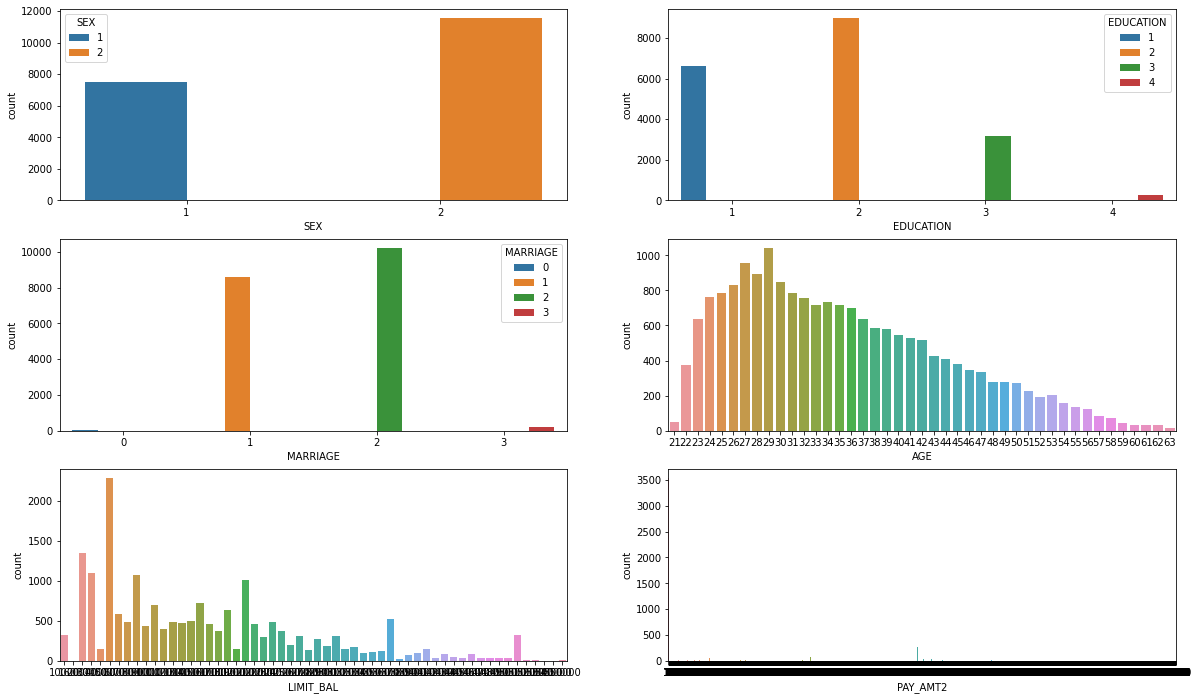

In [32]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x='SEX', hue = 'SEX', data = data_train, ax=axarr[0][0])
sns.countplot(x='EDUCATION', hue = 'EDUCATION', data = data_train, ax=axarr[0][1])
sns.countplot(x='MARRIAGE', hue = 'MARRIAGE', data = data_train, ax=axarr[1][0])
sns.countplot(x='AGE', data = data_train, ax=axarr[1][1])
sns.countplot(x='LIMIT_BAL', data = data_train, ax=axarr[2][0])
sns.countplot(x='PAY_AMT2', data = data_train, ax=axarr[2][1])

There are 20,000 credit card clients.

The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,658 NT dollars, ranging from 10,000 to 1M NT dollars.

Education level is mostly graduate school and university.

Most of the clients are either marrined or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

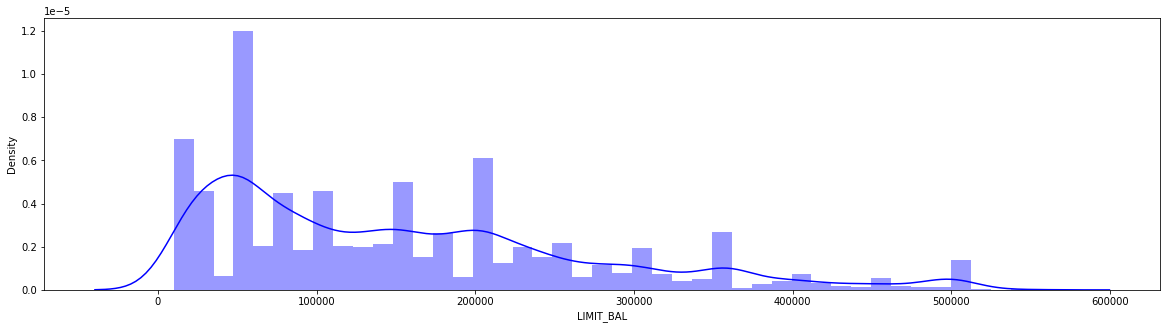

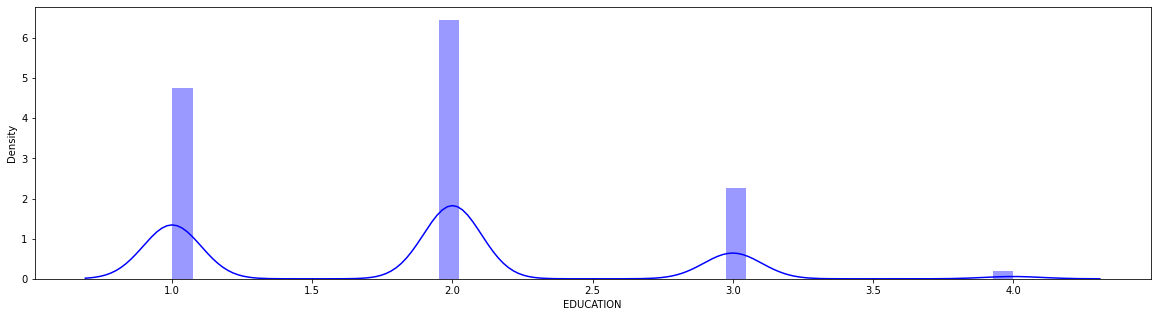

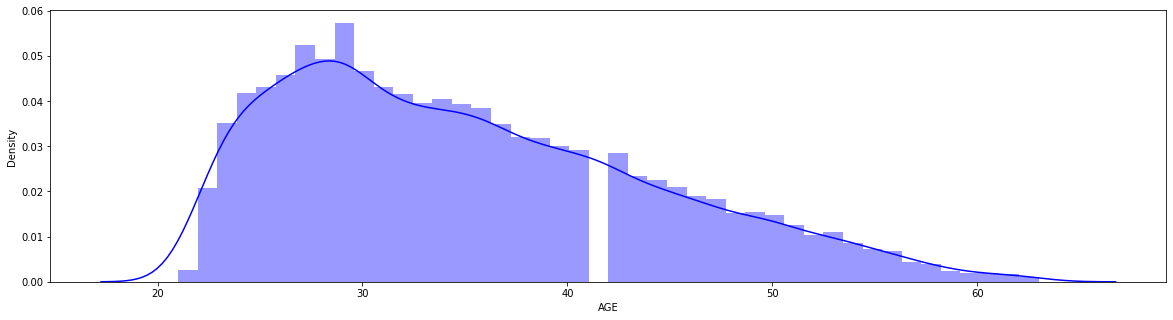

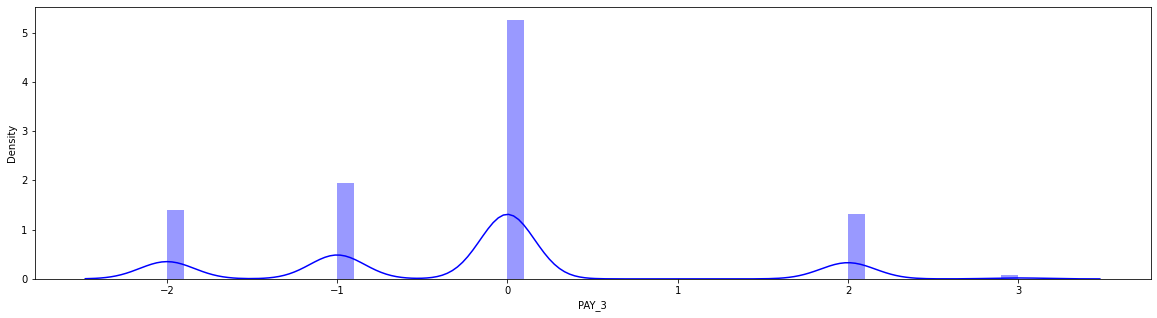

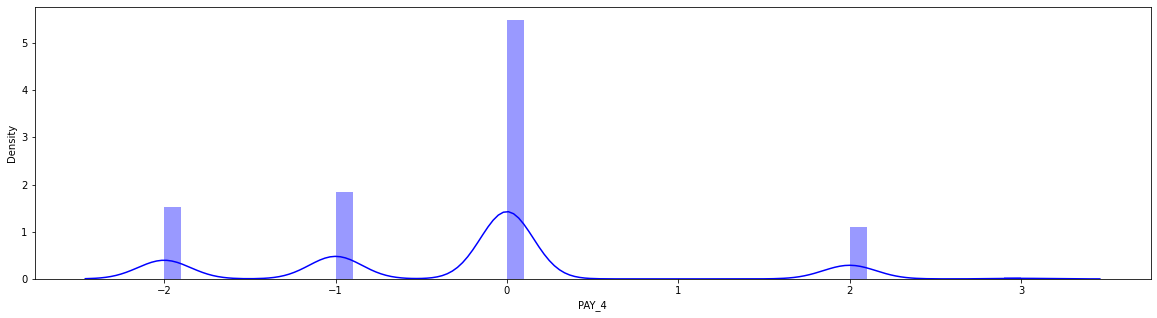

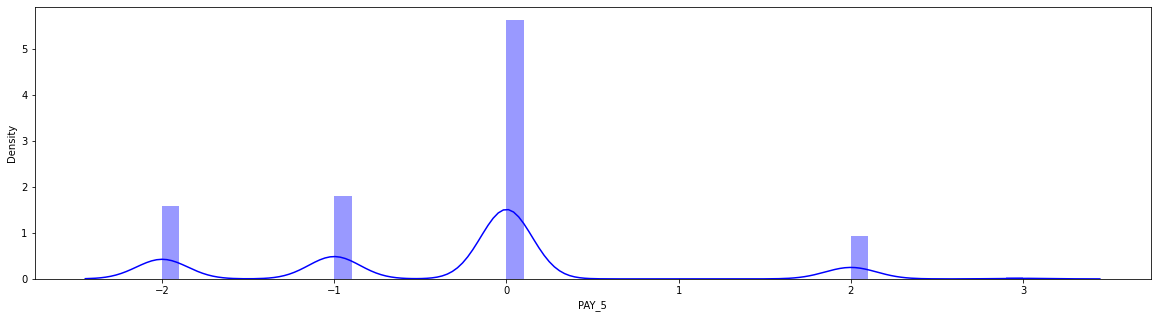

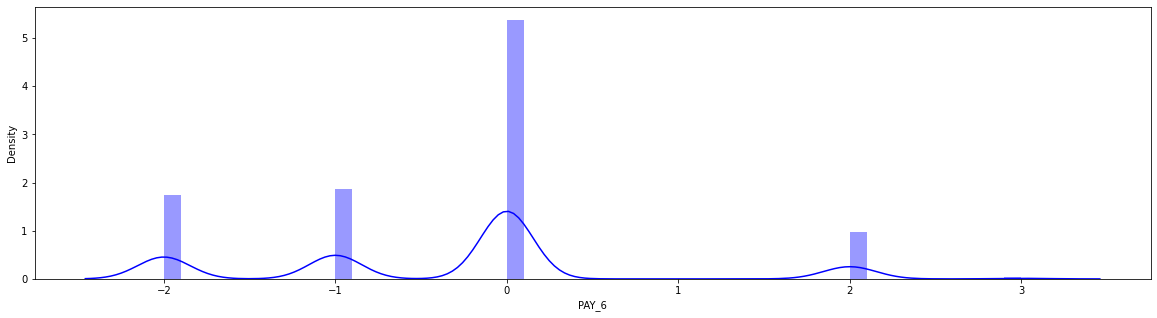

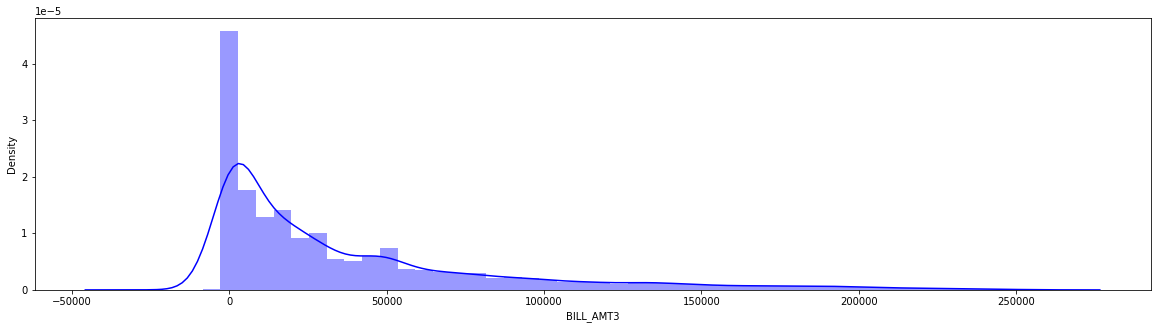

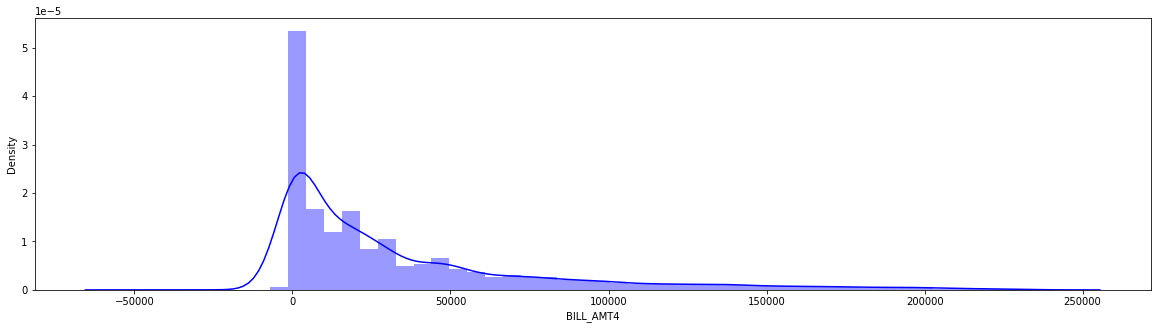

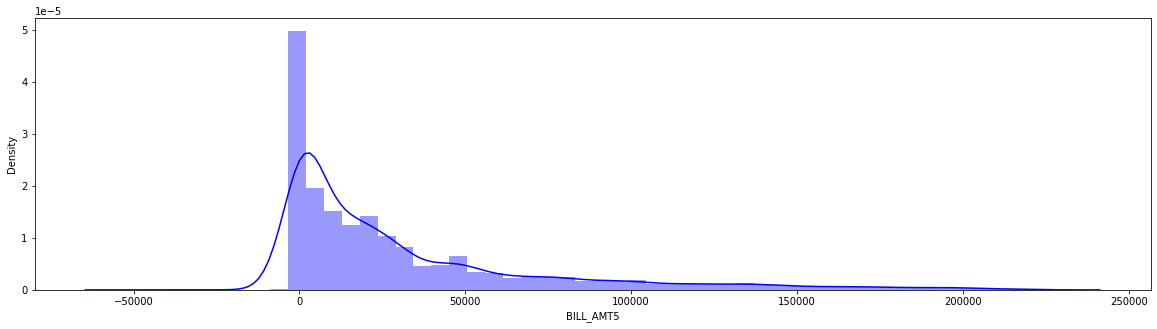

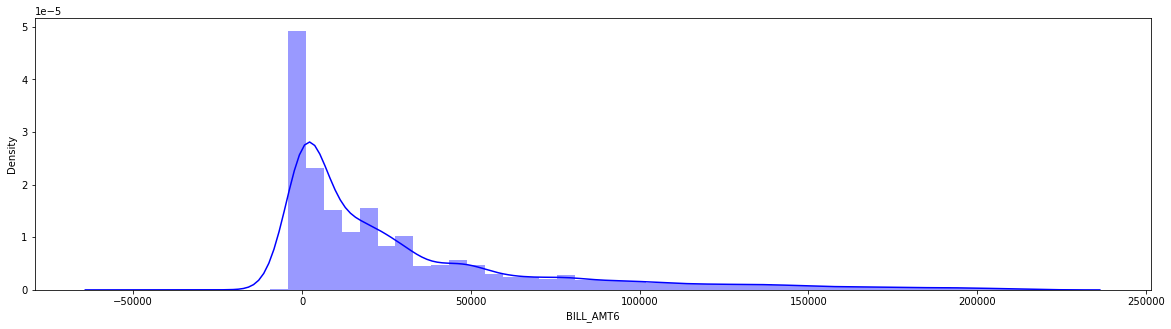

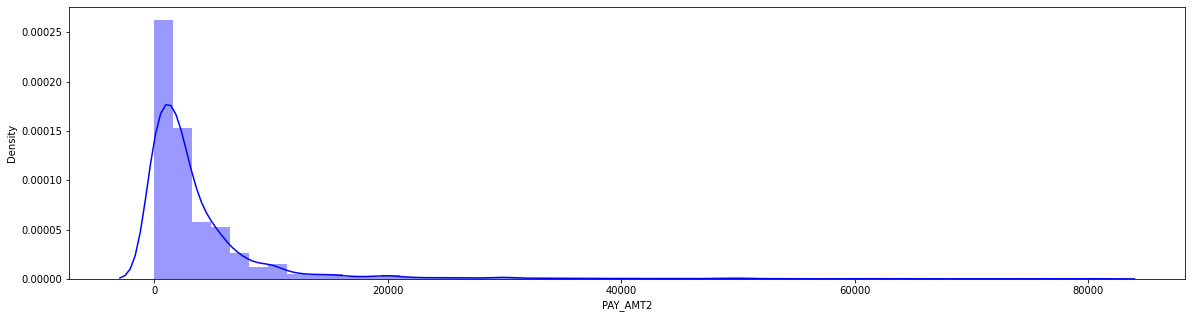

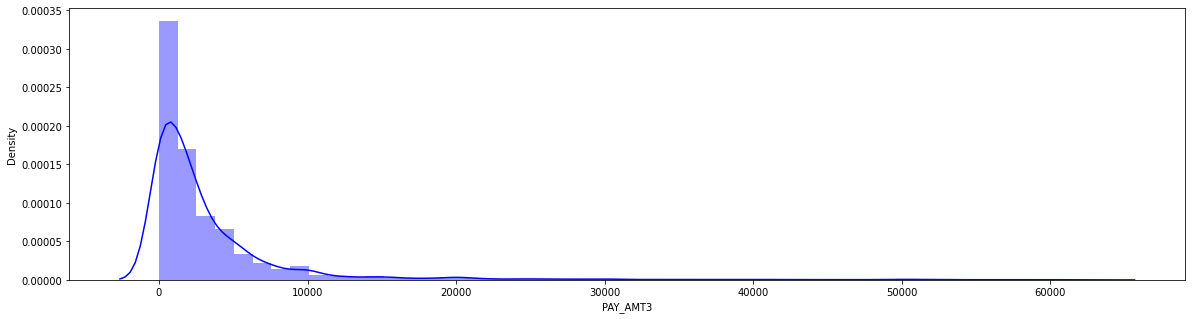

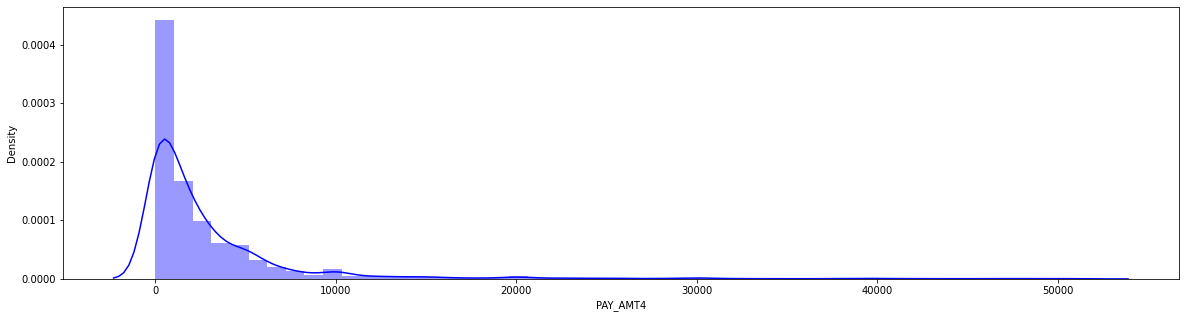

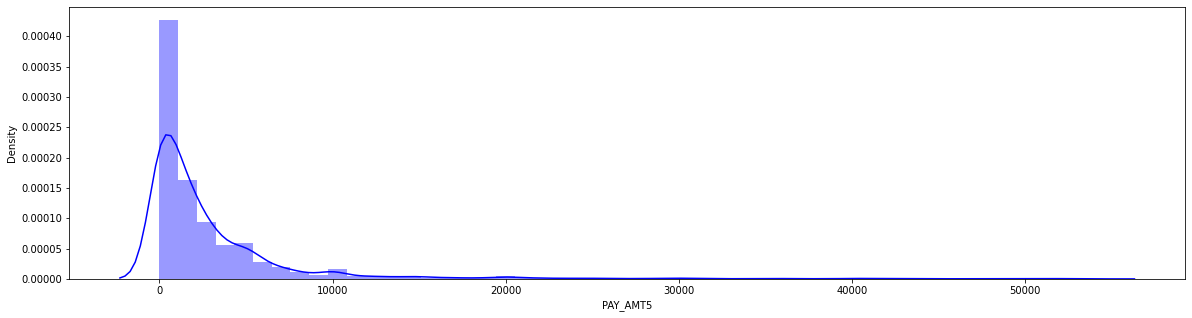

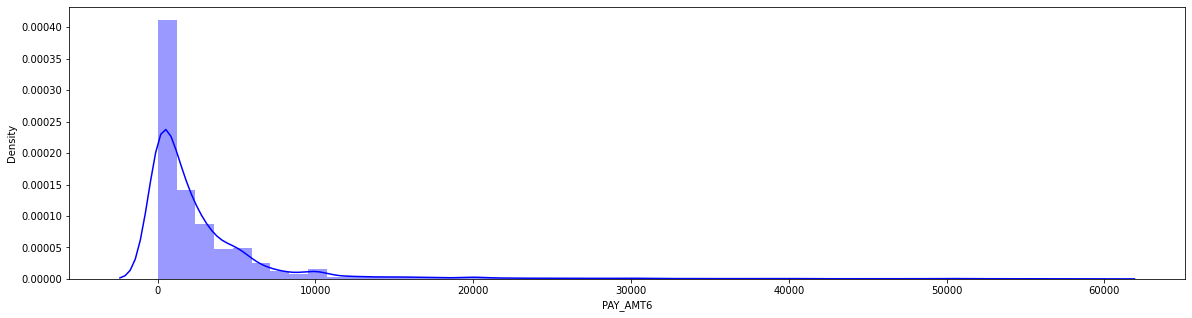

In [33]:
#Distribution Plot:
con_col = data_train.drop(['ID_CREDIT', 'SEX', 'MARRIAGE'], axis=1)
for i in con_col:
    plt.figure(figsize=(20,5))
    sns.distplot(data_train[i],color='b')
    plt.show()

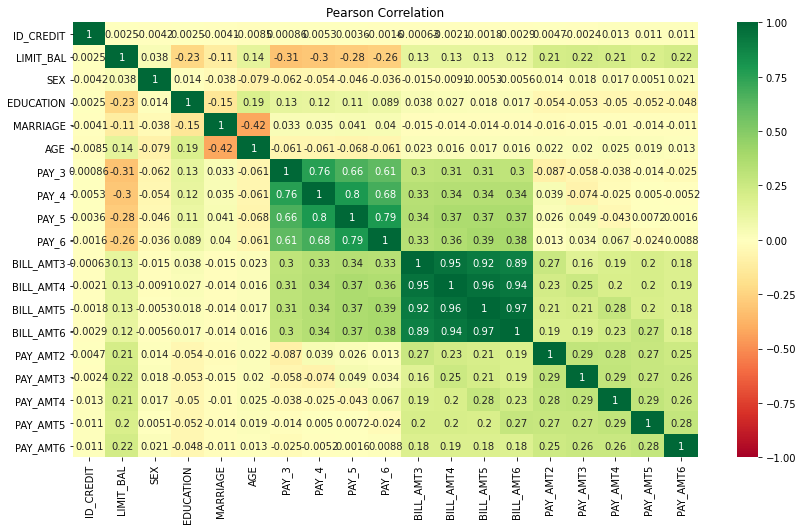

In [34]:
corr_pearson = data_train.corr(method = 'pearson')
fig = plt.figure(figsize = (14,8))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn',
            vmin=-1, vmax=1)
plt.title('Pearson Correlation')
plt.show()

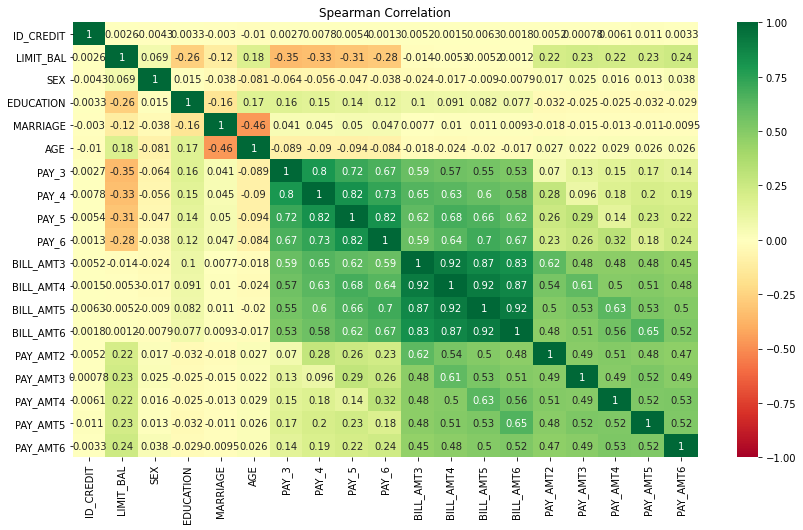

In [35]:
corr_spearman = data_train.corr(method = 'spearman')
fig = plt.figure(figsize = (14,8))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn',
            vmin=-1, vmax=1)
plt.title('Spearman Correlation')
plt.show()

<AxesSubplot:>

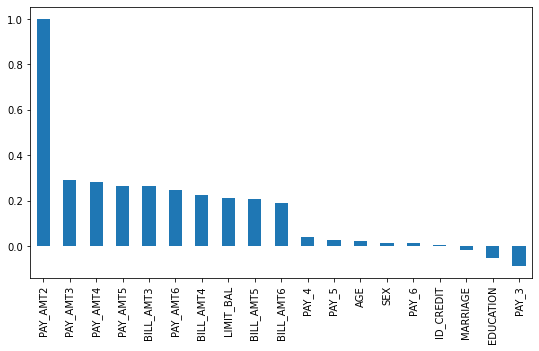

In [37]:
fig, ax = plt.subplots(figsize=(9,5))
data_train.corr()["PAY_AMT2"].sort_values(ascending=False).plot(kind="bar", ax=ax)